# Restaurant Rating Prediction

## Model Training

## 1) Problem statement

The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

## 2) Data Collection

### 2.1) Import Data and Required Packages

#### importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings

### 2.2)Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('zomato.csv/zomato_cleaned_data.csv')

## 3) Dataset information

### 3.1) Show Top 5 Records

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,jalsa,Yes,Yes,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
1,spice elephant,Yes,No,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
2,san churro cafe,Yes,No,3.8,41,Banashankari,Others,800.0,Buffet,Western Cuisine
3,others,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine


### 3.2) Number of Restaurants with Ratings ≤ 3.0

In [7]:
df[df['rate'] < 3.0].shape[0]


2257

#### Insight:
The dataset appears to be imbalanced, with only 4.36% (2,257 out of 51,717) of restaurants having a rating of 3.0 or below. This imbalance could affect model training, as the model might struggle to learn patterns for low-rated restaurants

## 4) Preparing X and Y variables

In [8]:
X = df.drop(['rate'], axis = 1)
y = df['rate']

## 5) Train Test Split

In [9]:
# separate dataset into train and test
X_train_df, X_test_df, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train_df.shape, X_test_df.shape)

(41373, 9) (10344, 9)


## 6) Feature Scaling with StandardScaler

In [10]:
numerical_columns = ["votes", "cost2plates"]
categorical_columns = ["name", "location","category", "rest_type","online_order", "book_table", "grouped_cuisines", ]

# Numerical pipeline (Standard Scaler)
num_pipeline = Pipeline(steps=[("scaler", StandardScaler())])

# Categorical pipeline (One Hot Encoder and Standard Scaler)
cat_pipeline = Pipeline(steps=[
("one_hot_encoder", OneHotEncoder(handle_unknown='ignore')),
("scaler", StandardScaler(with_mean=False))
])


# Column transformer applying the pipelines
preprocessor = ColumnTransformer(
transformers=[("num_pipeline", num_pipeline, numerical_columns),
              ("cat_pipeline", cat_pipeline, categorical_columns)
                ])

In [11]:

X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

X_test

<10344x5040 sparse matrix of type '<class 'numpy.float64'>'
	with 93092 stored elements in Compressed Sparse Row format>

## 7) Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
}

model_list = []
r2_list = []
best_model_name = None
best_model_r2 = -float('inf')
best_model_pred = None

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    # Track the best model based on R2 score
    if model_test_r2 > best_model_r2:
        best_model_r2 = model_test_r2
        best_model_name = list(models.keys())[i]
        best_model_pred = y_test_pred

    print('=' * 35)
    print('\n')

print(f"The best model is: {best_model_name} with R2 score of {best_model_r2:.4f}")
print("Predictions of the best model:")
print(best_model_pred)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0394
- Mean Absolute Error: 0.0152
- R2 Score: 0.9901
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0955
- Mean Absolute Error: 0.0366
- R2 Score: 0.9416


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0152
- Mean Absolute Error: 0.0025
- R2 Score: 0.9985
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1035
- Mean Absolute Error: 0.0247
- R2 Score: 0.9314


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1320
- Mean Absolute Error: 0.0668
- R2 Score: 0.8885
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1783
- Mean Absolute Error: 0.0975
- R2 Score: 0.7962


The best model is: Random Forest Regressor with R2 score of 0.9416
Predictions of the best model:
[3.901 2.8   3.792 ... 3.1   3.7   

## 8) Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Random Forest Regressor,0.941578
1,Decision Tree,0.931368
2,K-Neighbors Regressor,0.796214


## 9) Plot y_pred and best_model_pred

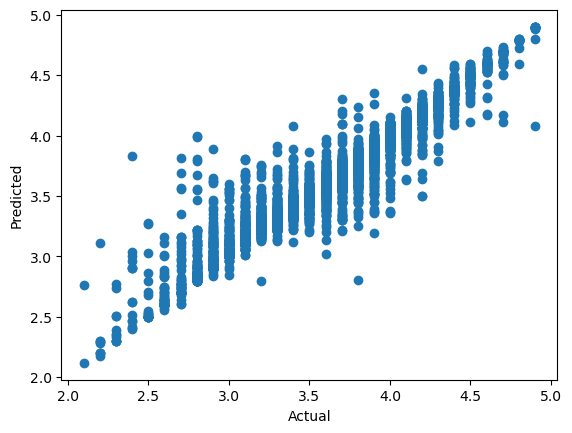

In [15]:
plt.scatter(y_test,best_model_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

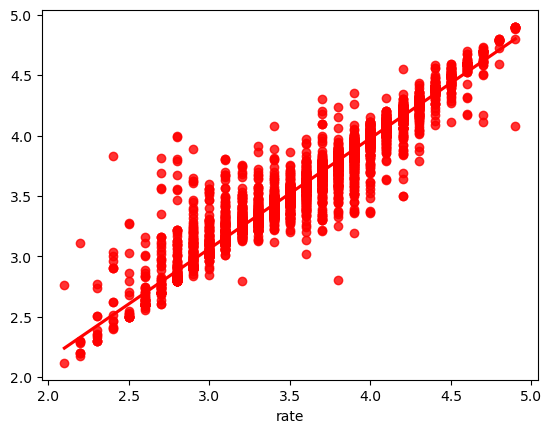

In [16]:
sns.regplot(x=y_test, y=best_model_pred, ci=None, color ='red');

## 10) Difference between Actual and Predicted Values

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':best_model_pred, 'Difference':y_test-best_model_pred})
pred_df['Index'] = range(0, len(pred_df))
#pred_df.sample(20)
pred_df[pred_df['Actual Value'] > 3]

,Actual Value,Predicted Value,Difference,Index
8440,3.9,3.901000,-1.000000e-03,0
16711,3.8,3.792000,8.000000e-03,2
42588,3.5,3.492000,8.000000e-03,3
5266,3.5,3.477645,2.235476e-02,4
24663,3.2,3.240000,-4.000000e-02,5
...,...,...,...,...
49217,4.1,3.937000,1.630000e-01,10339
39524,4.0,3.996000,4.000000e-03,10340
47849,3.1,3.100000,-4.440892e-16,10341
30475,3.7,3.700000,7.105427e-15,10342


In [18]:
table_row = X_test_df.iloc[[10343]]  

preprocessed_row = preprocessor.transform(table_row)  

prediction = models[best_model_name].predict(preprocessed_row)

print(f"The prediction for the given row is: {prediction[0]:.2f}")


The prediction for the given row is: 3.31


## 11) Conclusion:
- Random Forest is the best choice due to its balance between training and test performance.
- Decision Tree may be slightly overfitting, but it still performs well.
- KNN is not an effective model for this dataset and may need tuning or replacement.
- The dataset is imbalanced, with only 4.36% of restaurants having a rating of below 3.0. This could lead to bias in the model, where it performs well on the majority class (higher-rated restaurants) but struggles with underrepresented low ratings. To improve model generalization, techniques like resampling, class weighting, or adjusting evaluation metrics (e.g., RMSE, MAE) should be considered.